## 1T. Тема 3.2 Сверточные и полносвязные нейронные сети. Задание

## Задание

Используя набор данных MNIST, создайте свёрточную сеть классификации рукописных цифр. Сравните accuracy с полносвязной сетью из предыдущей темы. Сделайте выводы.

## Загрузка необходимых модулей

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from keras import utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.layers import Dropout, BatchNormalization
from keras.optimizers import Adam

from sklearn.metrics import confusion_matrix, accuracy_score
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

from PIL import Image

## Выборки данных, подготовка

### Загружаем данные MNIST

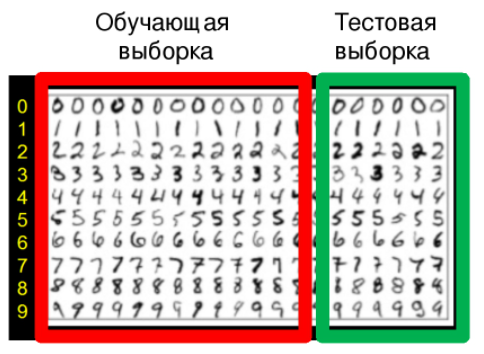

В TensorFlow, частью которого сейчас является Keras, есть тренировочные наборы данных, которые встроены в сам фреймворк. Загрузите датасет MNIST используя tensorflow\keras, либо загрузите его по ссылке : https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz

In [2]:
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

### Пример - выводим на экран картинку цифры из массива

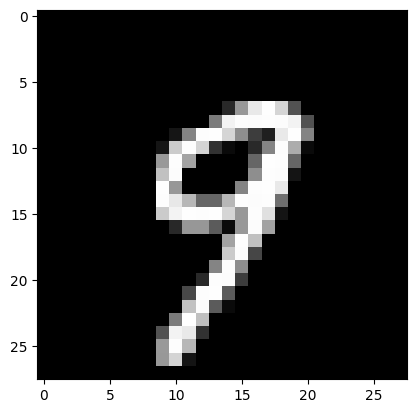

In [3]:
plt.imshow(Image.fromarray(x_train_org[57]).convert('RGB')) #Отрисовка картинки
plt.show()

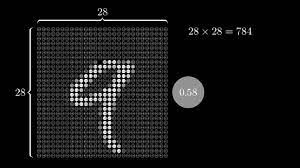

### Переводим данные в тип float
Данный тип (с плавающей точкой) необходим сетям Керас для обучения:

In [4]:
x_train_2D = x_train_org.astype('float32')
x_test_2D = x_test_org.astype('float32')

### Нормализуем данные
В данном случае можно использовать простой вариант. Цветов всего 255, и меняются они через равные промежутки, поэтому удобно не применять скейлер, а поделить массив на 255. Вообще, данные стараются свести все к одинаковому диапазону, обычно 0...1. Это нужно для того, чтобы все признаки одинаково оценивались нейросетью, без значительного перекоса в сторону тех, которые больше и потому сеть им уделяет больше внимания.

In [5]:
x_train_2D = x_train_2D / 255
x_test_2D = x_test_2D / 255

### Переводим метки в формат One Hot Encoding (OHE)

При кодировании в OHE, вместо числа получаем вектор из всех нулей, кроме одной цифры - вместо нуля на той позиции (индексе), которой соответствует кодируемая цифра, стоит 1. 

In [6]:
y_train = utils.to_categorical(y_train_org, 10)
y_test = utils.to_categorical(y_test_org, 10)

### Создаём модель Sequential (c помощью функции как в предыдущем задании)

**Sequential** - это последовательная модель, в которой слои нейронной сети укладываются последовательно, как слои в блинном пироге. (Можно взять архитектуру модели по аналогии со скринкастом)

In [7]:
# Не забудьте определить входной размер матрицы img_shape=(28,28,1), при передаче его в первый сверточный слой
# в качестве параметра input_shape
# Далее в последующих слоях можно не указывать input_shape, т.к keras сделает все преобразования за вас

In [23]:
model = Sequential() # Создаём свёрточную сеть
# Добавляем свёрточнный слой на 32 нейрона (фильтра, ядра), матрица 3x3 с relu-активацией
model.add(Conv2D(32, 3, padding = 'same',
                 input_shape=(28,28,1), activation="relu")
                 )
model.add(MaxPooling2D()) # пулинг слой уменьшения размерности Dropout, BatchNormalization
model.add(Dropout(0.5)) # слои регуляризации
model.add(BatchNormalization())
model.add(Flatten()) # Вытягиваем данные в одномерный вектор только для классификационного слоя
model.add(Dense(500, activation="relu")) # Добавляем полносвязный слой на 400 нейронов с relu-активацией
model.add(Dense(10, activation="sigmoid")) # Добавляем полносвязный слой на 10 нейронов с softmax-активацией
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.0005), metrics=["accuracy"]
              ) # Компилируем модель

print(model.summary()) #Вывод структуры модели

Model: "sequential_92"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_92 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_92 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_92 (Dropout)        (None, 14, 14, 32)        0         
                                                                 
 batch_normalization_92 (Ba  (None, 14, 14, 32)        128       
 tchNormalization)                                               
                                                                 
 flatten_92 (Flatten)        (None, 6272)              0         
                                                                 
 dense_184 (Dense)           (None, 500)             

In [24]:
my_model = model.fit(x_train_2D, y_train, batch_size=128, epochs=7,
                     validation_split=0.1, verbose=1)

Epoch 1/7


422/422 [==============================] - 53s 123ms/step - loss: 0.0429 - accuracy: 0.9387 - val_loss: 0.0390 - val_accuracy: 0.9820
Epoch 2/7
422/422 [==============================] - 52s 124ms/step - loss: 0.0162 - accuracy: 0.9788 - val_loss: 0.0097 - val_accuracy: 0.9875
Epoch 3/7
422/422 [==============================] - 51s 122ms/step - loss: 0.0107 - accuracy: 0.9861 - val_loss: 0.0077 - val_accuracy: 0.9897
Epoch 4/7
422/422 [==============================] - 51s 122ms/step - loss: 0.0084 - accuracy: 0.9892 - val_loss: 0.0075 - val_accuracy: 0.9893
Epoch 5/7
422/422 [==============================] - 52s 123ms/step - loss: 0.0065 - accuracy: 0.9921 - val_loss: 0.0076 - val_accuracy: 0.9887
Epoch 6/7
422/422 [==============================] - 56s 132ms/step - loss: 0.0052 - accuracy: 0.9937 - val_loss: 0.0064 - val_accuracy: 0.9913
Epoch 7/7
422/422 [==============================] - 55s 130ms/step - loss: 0.0045 - accuracy: 0.9947 - val_loss: 0.0072 - val_accuracy: 0.9900


#### Выводим график точности на обучающей и валидационной выборке


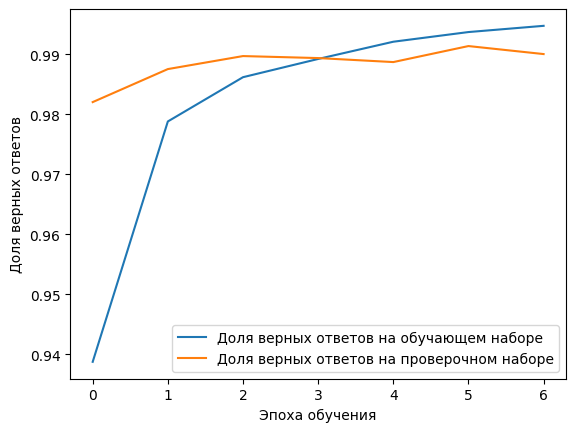

In [25]:
# Выводим график точности на обучающей выборке
# label - имя графика в легенде
plt.plot(my_model.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')

# Выводим график точности на проверочной выборке
plt.plot(my_model.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')

# Выводим подписи осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')

# Выводим легенду
plt.legend()
plt.show()

Точность на обучающей и валидационной выборке различается всего на 5 тысячных, и максимально близка к единице.

##### Строим матрицу ошибок

In [26]:
y_test_2D_pred = model.predict(x_test_2D) # прогнозируем моделью тестовые метки
y_test_2D_pred_= np.argmax(y_test_2D_pred, axis=1)
y_test_ = np.argmax(y_test, axis=1)

print(f'Качество модели на тестовой выборке: {round(accuracy_score(y_test_, y_test_2D_pred_), 4)}')

  6/313 [..............................] - ETA: 3s 

313/313 [==============================] - 4s 12ms/step
Качество модели на тестовой выборке: 0.9896


Text(72.72222222222221, 0.5, 'predicted label')

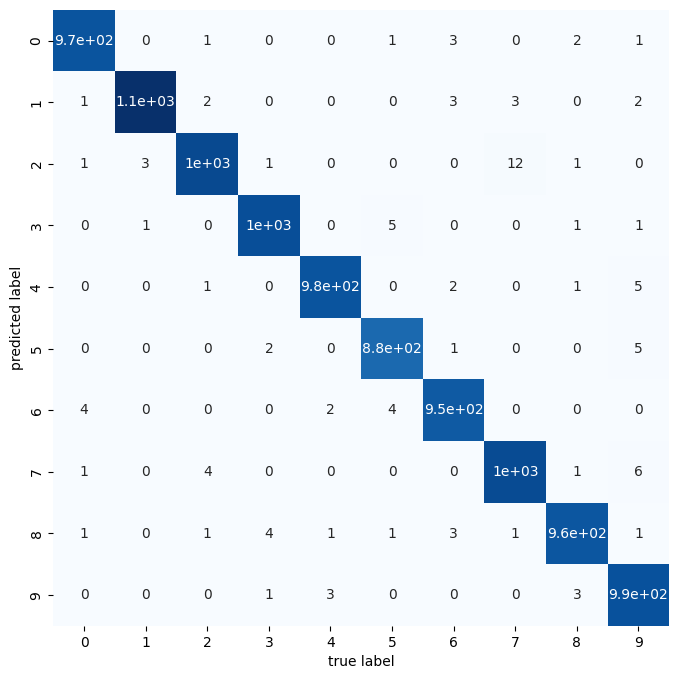

In [27]:
plt.figure(figsize=(8, 8)) # задаем размеры всего рисунка
cm = confusion_matrix(y_test_2D_pred_, y_test_) # создаём матрицу ошибок
sns.heatmap(cm, square=True, annot=True, cmap='Blues', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

Точность на тестовой выборке составила 0.9899 против 0.9947 на обучающей, что является хорошим результатом и показывает, что модель адекватна.

### 2. Задание ПРО (Не обязательно к выполнению). Используя GridSearch, оптимизируйте свёрточную нейронную сеть для наилучшей классификации. Также, подберите для неё наилучший по параметрам регуляризатор. Сделайте выводы.

In [14]:
def custom_model():
    model = Sequential()
    model.add(Conv2D(32, 3, padding = 'same',
                    input_shape=(28,28,1), activation="relu")
                    )
    model.add(MaxPooling2D())
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dense(500, activation="relu"))
    model.add(Dense(10, activation="sigmoid"))
    model.compile(loss='binary_crossentropy',
                optimizer=Adam(learning_rate=0.0005), metrics=["accuracy"]
                )

    return model

In [15]:
model = KerasClassifier(build_fn=custom_model, batch_size=128,
                        epochs=7, validation_split=0.1,
                        optimizer='Adam', verbose=0
                        )

In [16]:
params = [
    {'batch_size': [64, 128]}, 
    {'epochs': [5, 10]},
    {'validation_split': [0.1, 0.2]},
    {'optimizer': ['Adam', 'SGD', 'RMSprop']}
]

grid_search = GridSearchCV(model, param_grid=params, cv=10, scoring='accuracy')
grid_search.fit(X=x_train_2D, y=y_train)

c:\Users\carol\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


c:\Users\carol\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\carol\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\carol\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\carol\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which poi

GridSearchCV(cv=10,
             estimator=KerasClassifier(batch_size=128, build_fn=<function custom_model at 0x000001FA654863E0>, epochs=7, optimizer='Adam', validation_split=0.1, verbose=0),
             param_grid=[{'batch_size': [64, 128]}, {'epochs': [5, 10]},
                         {'validation_split': [0.1, 0.2]},
                         {'optimizer': ['Adam', 'SGD', 'RMSprop']}],
             scoring='accuracy')

In [18]:
grid_search.best_estimator_

KerasClassifier(
	model=None
	build_fn=<function custom_model at 0x000001FA654863E0>
	warm_start=False
	random_state=None
	optimizer=Adam
	loss=None
	metrics=None
	batch_size=128
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.1
	shuffle=True
	run_eagerly=False
	epochs=10
	class_weight=None
)

Лучшие параметры в результате перебора - оптимизатор Адам, batch_size=128, validation_split=0.1 и 10 эпох.

In [19]:
grid_search.best_score_

0.9898333333333331

Качество лучшей модели по результатам перебра чуть ниже, чем при начальных параметрах - 0.9898 против 0.9947. Посмотрим результаты на тестовой выборке.

In [21]:
y_test_2D_pred = grid_search.predict_proba(x_test_2D)
y_test_2D_pred_= np.argmax(y_test_2D_pred, axis=1)
y_test_ = np.argmax(y_test, axis=1)

print(f'Качество модели на тестовой выборке c лучшей моделью: {round(accuracy_score(y_test_, y_test_2D_pred_), 4)}')

Качество модели на тестовой выборке c лучшей моделью: 0.9903


Точность модели на тестовой выборке наоборот удалось немного улучшить - 0.9903 против 0.9899.

Text(72.72222222222221, 0.5, 'predicted label')

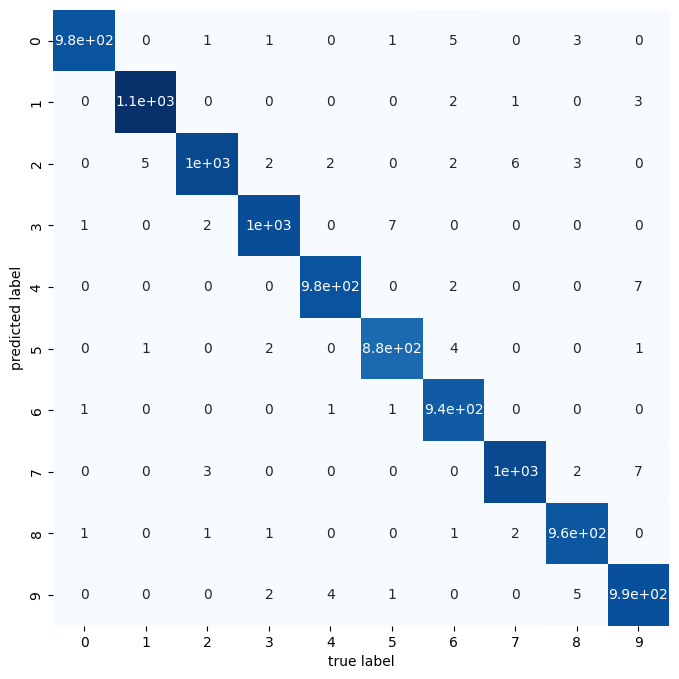

In [22]:
plt.figure(figsize=(8, 8))
cm = confusion_matrix(y_test_2D_pred_, y_test_)
sns.heatmap(cm, square=True, annot=True, cmap='Blues', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

**Вывод**

Лучшие параметры в результате перебора - оптимизатор Адам, batch_size=128, validation_split=0.1 и 10 эпох. Такие параметры позволили достичь точности на тестовой выборке, равной 0.9903.

## Литература


1. https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

2. https://creativecommons.org/licenses/by/4.0/

3. https://cs.stanford.edu/~acoates/stl10/

4. https://www.tensorflow.org/datasets/catalog/overview

5. https://keras.io/api/datasets/

6. https://en.wikipedia.org/wiki/Sensitivity_and_specificity

7. https://en.m.wikipedia.org/wiki/Batch_normalization#:~:text=Batch%20normalization%20(also%20known%20as,and%20Christian%20Szegedy%20in%202015.)

8. https://jmlr.org/papers/v15/srivastava14a.html

9. https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

10. https://neurohive.io/ru/osnovy-data-science/glubokaya-svertochnaja-nejronnaja-set/

11. https://ru.wikipedia.org/wiki/%D0%A1%D0%B2%D1%91%D1%80%D1%82%D0%BE%D1%87%D0%BD%D0%B0%D1%8F_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D0%B0%D1%8F_%D1%81%D0%B5%D1%82%D1%8C

12. Автор: Max La - собственная работа, CC BY-SA 3.0, https://commons.wikimedia.org/w/index.php?curid=33394271

13. Y. LeCun, B. Boser, J. S. Denker, D. Henderson, R. E. Howard, W. Hubbard and L. D. Jackel: Backpropagation Applied to Handwritten Zip Code Recognition, Neural Computation, 1(4):541-551, Winter 1989.

14. https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/






